In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('Data\dermatology_database_1.csv')

# Handle missing values (replace '?' with NaN)
data.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Split features (X) and target variable (y)
y = data['class']
X = data.drop(columns='class')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # Use a linear kernel for simplicity

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9722222222222222


Shape of X_train: (286, 34)


IndexError: tuple index out of range

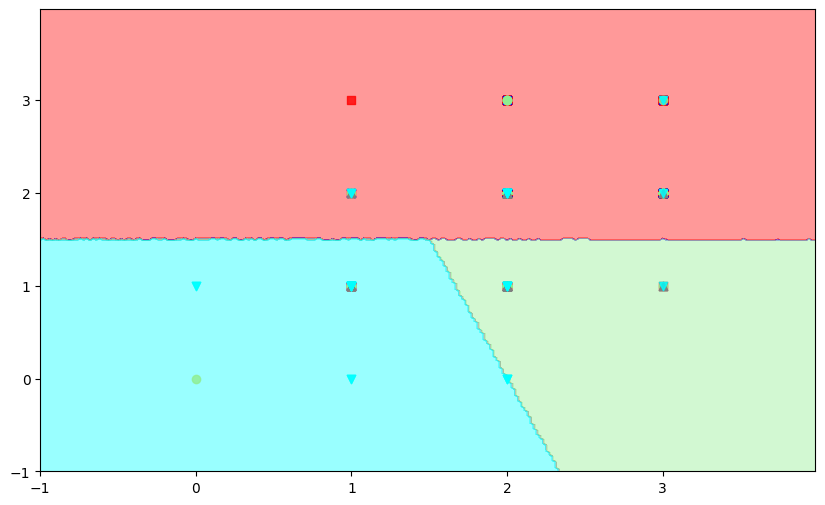

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

# Check the shape of X_train
print("Shape of X_train:", X_train.shape)

# Select two features for visualization
X_vis = X_train.iloc[:, :2].values
y_vis = y_train

# Train an SVM classifier with a linear kernel
svm_classifier_vis = SVC(kernel='linear', C=1, random_state=42)
svm_classifier_vis.fit(X_vis, y_vis)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_vis, y_vis, svm_classifier_vis)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of SVM Classifier (Two Features)')
plt.legend(loc='upper right')
plt.show()


In [18]:
y.unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)